In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
HS = pd.read_csv('Heiligenstadt_2015_01_Data_LENGTHS.csv')
HS.head()
MZ_S7_WB = pd.read_csv("MZ_S7_WB_01_Data_LENGTHS.csv")
MZ_S7_WB.head()

All_lengths = pd.concat([HS, MZ_S7_WB], axis=0)
All_lengths.head()

,Unnamed: 0,filename,length_in_seconds
0,0,N81_602HS_000_2010-01-01_00-04-27_01.WAV,47.1
1,1,N81_602HS_000_2010-01-01_00-04-41_01.WAV,47.1
2,2,N81_602HS_000_2010-01-01_00-05-57_01.WAV,47.1
3,3,N81_602HS_000_2010-01-01_00-06-11_01.WAV,47.1
4,4,N81_602HS_000_2010-01-01_00-07-27_01.WAV,47.1


Unnamed: 0           0.004467
filename             0.004467
length_in_seconds    0.004467
dtype: float64

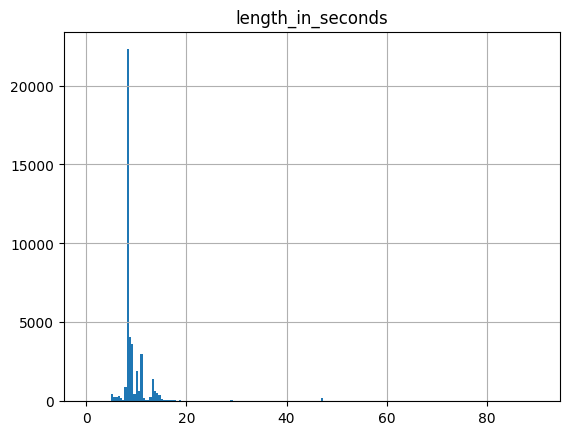

In [3]:
#make a histogram
df = All_lengths
df.hist(column='length_in_seconds', bins=200)

#how many percent are 0
df[df['length_in_seconds'] == 0].count() / df.count() * 100

In [4]:
df = df.reset_index(drop=True)
summary = df.describe()['length_in_seconds'].to_frame()
summary

,length_in_seconds
count,44775.000000
mean,10.177896
std,5.626512
min,0.000000
25%,8.200000
50%,8.500000
75%,10.200000
max,90.000000


In [5]:
df[df['length_in_seconds'] == 0]

,Unnamed: 0,filename,length_in_seconds
26672,26672,N81_602HS_002_2016-10-28_13-28-23_01.WAV,0.0
27867,27867,N81_602HS_002_2016-11-10_02-58-14_01.WAV,0.0


In [12]:
over_40 = df[df['length_in_seconds'] > 40]

#save over_40
over_40.to_csv('over_40.csv', index=False)

In [7]:
df[df['length_in_seconds'] == 47.1]

,Unnamed: 0,filename,length_in_seconds
0,0,N81_602HS_000_2010-01-01_00-04-27_01.WAV,47.1
1,1,N81_602HS_000_2010-01-01_00-04-41_01.WAV,47.1
2,2,N81_602HS_000_2010-01-01_00-05-57_01.WAV,47.1
3,3,N81_602HS_000_2010-01-01_00-06-11_01.WAV,47.1
4,4,N81_602HS_000_2010-01-01_00-07-27_01.WAV,47.1
...,...,...,...
193,193,N81_602HS_000_2017-01-12_12-56-53_01.WAV,47.1
194,194,N81_602HS_000_2017-01-12_12-58-23_01.WAV,47.1
195,195,N81_602HS_000_2017-01-12_12-59-53_01.WAV,47.1
196,196,N81_602HS_000_2017-01-12_13-01-23_01.WAV,47.1


In [8]:
df["length_in_seconds"].mode()

0    8.1
Name: length_in_seconds, dtype: float64

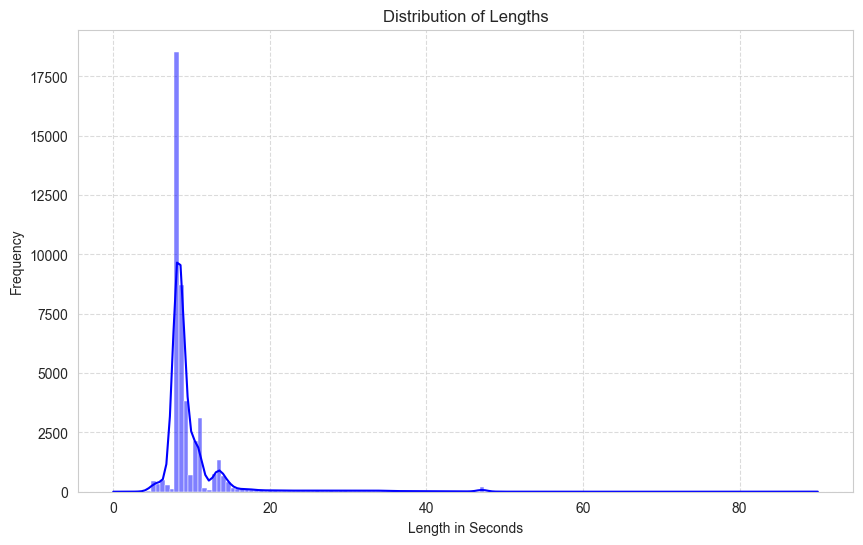

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style to a white background with grid lines
sns.set_style("whitegrid")

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram using seaborn's distplot
sns.histplot(df, x='length_in_seconds', bins=150, color='blue', kde=True, ax=ax)

# Set labels and title
ax.set_xlabel('Length in Seconds')
ax.set_ylabel('Frequency')
plt.title('Distribution of Lengths')

# Add a grid
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()
